# Conversion between NumPy and PyTorch

In [1]:
import torch
import numpy as np

In [2]:
x = np.random.rand(10)
y = torch.from_numpy(x)
y

tensor([0.9727, 0.0483, 0.3608, 0.7566, 0.7255, 0.8127, 0.5432, 0.0639, 0.0764,
        0.0674], dtype=torch.float64)

In [3]:
y.numpy()

array([0.97268312, 0.04829992, 0.36080203, 0.75659677, 0.72554304,
       0.8126626 , 0.54317413, 0.06389716, 0.07636583, 0.06739195])

This means it's easy to get a CSV onto the GPU:

In [4]:
import pandas as pd
df = pd.read_csv("demo1.csv")
df.head()

,a,b
0,1,2
1,5,1
2,9,1


In [7]:
y = torch.from_numpy(df.values)
y.cuda()

## How long does NumPy conversion take?

Converting between a PyTorch tensor and NumPy array is very quick.  They share the same memory structure; it's a simple memory copy.

I decided to time this:

In [8]:
a = torch.from_numpy(np.random.rand(10_000))
%timeit a.numpy()

1.13 µs ± 95.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


How does it compare with Tensorflow?

In [9]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
tf.enable_eager_execution()

# Dynamic graph; uses eager execution
a = tf.constant(np.random.rand(10_000))
%timeit a.numpy()

/Users/scott/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
10.4 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [1]:
import tensorflow as tf
import numpy as np

# Static graph
sess = tf.Session()
a = tf.constant(np.random.rand(10_000))
%timeit a.eval(session=sess)

/Users/scott/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


267 µs ± 65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


This timing can be more complete; here's a chart as $n$ varies from [my blog post][1].

[1]:https://stsievert.com/blog/2017/09/07/pytorch/

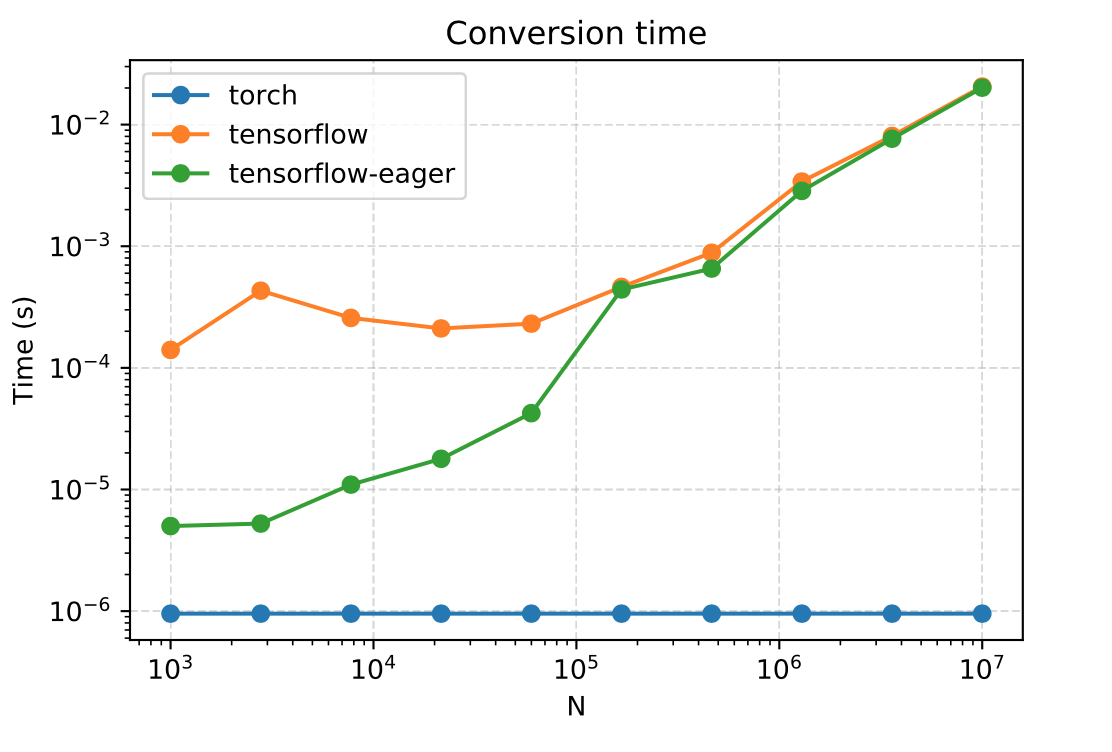

In [16]:
from IPython.display import Image
Image("imgs/conversion.png", width=500)

Isn't converted 10 million parameters unrealistic?

In [6]:
import torchvision
import torch
from toolz import reduce

In [7]:
est = torchvision.models.resnet18()
# est = models.resnet152()

In [8]:
def num_params(size):
    return reduce(lambda x, y: x * y, size)
    

sizes = [num_params(x.size()) for x in est.parameters()]
print("{:0.2f} million parameters".format(sum(sizes) / 1e6))

11.69 million parameters


## Enabling feature

PyTorch tensors and NumPy arrays share the same memory locations and structure.

That means converting between the two is basically passing the pointer around.

Illustrating example:

In [9]:
import numpy as np
import torch

In [10]:
numpy_array = np.ones(3)
pytorch_tensor = torch.from_numpy(numpy_array)
pytorch_tensor

tensor([1., 1., 1.], dtype=torch.float64)

In [11]:
numpy_array *= 2
numpy_array

array([2., 2., 2.])

In [12]:
pytorch_tensor

tensor([2., 2., 2.], dtype=torch.float64)